In [ ]:
# HSIN-JU, CHAN.  1920253 

# Coursework Assignment  
# DUE on KEATS on Monday 9th of December, by 2355 (GMT)

- This is worth 10% of your final grade
- There are five parts to this assignment and the breakdown of the points is at the end of the .ipynb notebook.
- You should complete all answer cells in the iPython notebook (.ipynb), and submit the completed notebook on Keats.
- Use the specified file names for each of the scripts - marks will be deducted for not following these instructions
- You must do and submit your own work, there is no collaborating and no group work allowed on this module. Submissions will be evaluated using a software similarity plagarism checker. This checker is able to detect if code has been shared, even if it has been modified in an attempt to evade it (e.g. variable name changes, structural changes, etc). The penalties for plagarism are very strict, and may result in failing the module.
- Make sure that you properly comment your code, so that the person marking this can understand what your program is doing. Uncommented or poorly commented code will result in mark deductions.


Notes: 
1. For each of the below questions, please provide code in the indicated cells. 
2. Read over the coursework instructions fully before starting. Please read each part carefully, as there may be multiple subquestions contained within each part.

# The Data

The data for this assignment is on Keats as a .zip file. Download the .zip file and unpack it to a **data/** directory. The **data/** directory should be in the same directory as your python scripts.

(In spyder make sure the environment is pointing to this directory). Make sure that your python
scripts read input data files and write output data files to the **data/** directory. Any files that are
output elsewhere will not be graded

# Overview

This coursework will have you working with XML, CSV, and JSON files with data related to a Pizza Shop! Your scripts will read and write data files, and a set of sample of input and output files are provided for you as an example of the format of the expected output.

## Part 1: Pizza Menu

The "CMP Pizza Shop", has menu options stored in an XML data file, called **pizza.xml**. You will find the menu in the **pizza.xml** file in the **data.zip** provided with this Coursework.

The **pizza.xml** file includes the following information:

- the name of the pizza shop
- the sizes of the pizzas
- the toppings available
- the different crusts

Here is an example menu in xml, for illustrative purposes (note that the pizza.xml file provided in the data.zip archive, might be different from this example):

    <pizza>
    	<shopname>CMP Pizza Shop</shopname>
    	<sizes>
    		<size code="L">Large</size>
    		<size code="XL">Extra Large</size>
    	</sizes>
    	<toppings>
    		<topping code="x">Extra Cheese</topping>
    		<topping code="m">Mushrooms</topping>
    	</toppings>
    	<crusts>
    		<crust code="thick">Thick Crust</crust>
    	</crusts>
    </pizza>

### Question 1 (a)

Write python code in the below indicated cell, that reads in the **pizza.xml** file (located in data.zip), as an input using **xml.etree.ElementTree module**. (See lecture 2 and lab 2). Make sure you implement exception handling.

### Question 1 (b)

Using the ElementTree structure, print a human readable menu of pizza options for the pizza shop. This must include the pizza shop name, the pizza sizes, toppings, and crust options. For example, a human readable menu might look like the below:

        CMP Pizza Shop
        Sizes
        - Large
        - Extra Large

        Toppings
        - Extra Cheese
        - Mushrooms

        Crusts
        - Thick Crust


In [1]:
#(a)
import xml.etree.ElementTree as et
try:
    tree = et.ElementTree(file = 'data/pizza.xml')
    root = tree.getroot()
#     for child in root:
#         print('tag:', child.tag, ' attributes:', child.attrib, 'text:', child.text)
#         for grandchild in child:
#             print('\ttag:', grandchild.tag, ', attributes:', grandchild.attrib, ', text:', grandchild.text)
except Exception as e:
    print('error %s' %e)

#(b)
tagg  = [child.tag for child in root]  #list of child.tag: ['shopname', 'sizes', 'toppings', 'crusts']
c_text = [child.text for child in root]  #list of child.text: 'CMP Pizza Shop'
m_text = ['-' + m.text for child in root for m in child]  #show the list of the text 
size = m_text[0:5]        #['-Extra Small', '-Small', '-Medium', '-Large', '-Extra Large']
top = m_text[5:8]        #['-Chilli', '-Mushrooms', '-Extra Cheese']
crust = m_text[8:12]    #['-Thin Crust', '-Thick Crust', '-Cheesy Crust', '-Tomato Crust']

print(c_text[0]) #print CMP Pizza Shop 
print(tagg[1])
for i in range(0,5):
    print(size[i])
print(tagg[2])
for j in range(0,3):
    print(top[j])
print(tagg[3])
for x in range(0,4):
    print(crust[x])

CMP Pizza Shop
sizes
-Extra Small
-Small
-Medium
-Large
-Extra Large
toppings
-Chilli
-Mushrooms
-Extra Cheese
crusts
-Thin Crust
-Thick Crust
-Cheesy Crust
-Tomato Crust


## Part 2: Pizza Report

Using the datastructure created in **Part 1** of this coursework, write a program in the below indicated space that calculates the following:

### Question 2 (a)

1. The number of pizza sizes that are available from our pizza menu
2. The number of toppings that are available in the pizza menu
3. The number of crust options available in the pizza menu
4. The total number of combinations of **different** pizzas that can be assembled from this menu. 

Assume the following about each pizza:
	
- a pizza can only be one size (one pizza cannot be large and extra large at the same time)
- a pizza can have any combinations of toppings, including none, one or all
- a pizza can only have one type of crust (i.e. either thick or thin crust)

Print the output of each calculation, along with a string denoting the value. For example

    Number of pizza sizes = 2
    Number of toppings = ...
    ...

### Question 2 (b)

After printing these calculations, use the python CSV module to output your calculations as a single row of data to a CSV file with the name **pizza_report.csv**. Assume the following header for your CSV file along with the calculated numbers from the previous example:

    sizes,toppings,crusts,total_combo  

### Question 2 (c)

After writing the report, re-open the file **pizza_report.csv**, and print each line of the file to the notebook.

In [2]:
#(a)
print('Number of pizza sizes = %s ' %(len(root[1])))
print('Number of toppings = %s' %(len(root[2])*2+2))    
print('Number of crusts = %s' %(len(root[3])))
print('Total number of pizza = %s' %(len(root[1])*(len(root[2])*2+2)*len(root[3])))

#(b)
import csv
headers=['sizes', 'toppings', 'crusts', 'total_combo']
rows2 = ['5','8','4','160']
with open('pizza_report.csv', 'w') as pf:
    pizCsv = csv.writer(pf, delimiter = ',')
    pizCsv.writerow(['sizes', 'toppings', 'crusts', 'total_combo'])
    pizCsv.writerow(['5','8','4','160'])
    
#(c)
import csv
with open('pizza_report.csv', 'r') as pf1:
    rows = csv.reader(pf1)
    for row in rows:
        print(row)

Number of pizza sizes = 5 
Number of toppings = 8
Number of crusts = 4
Total number of pizza = 160
['sizes', 'toppings', 'crusts', 'total_combo']
['5', '8', '4', '160']


## Part 3: Pizza Specials


In addition to the standard menu, the CMP pizza shop also stores **Pizza Specials** in a file **pizza_specials.csv**, with the following format:

    name,size,toppings,crust  
    Supreme,XL,xm,thick  
    Simple Cheese,L,x,thick


Every pizza special has a name, a size, a combination of toppings, and a crust. The size, toppings, and crust are referenced by a code attribute, which is specified in the pizza.xml XML file. For example, the topping code for Mushrooms is "m", and the topping code for Extra Cheese is "x". The Supreme pizza has both Mushrooms and Extra Cheese as designated by the string "xm". 

### Part 3 (a)

Write code in the answer cell below, that reads in the pizza.xml file (again using the xml.etree.ElementTree module) and stores the sizes, toppings, and crusts in dictionaries with the code for that element as the key and the text for the element as the value.

### Part 3 (b)

Using these dictionaries, read in the Pizza Specials from the pizza_specials.csv file and convert them to a menu text description. 

### Part 3 (c)

Write code to output each special's menu description as a human readable line in a text file called **pizza_specials.txt**. For example, the Supreme special would be output in the txt file as:

        Supreme: Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust 
   
### Part 3 (d)

After writing the pizza Specials, re-open the file **pizza_specials.txt**, and print each line of the file to the notebook.

In [3]:
# Part 3 (a)  
import random
import xml.etree.ElementTree as et
tree = et.ElementTree(file = 'data/pizza.xml')
root = tree.getroot()

att = [a.attrib['code'] for child in root for a in child ]  #list of all the code: ['XS', 'S', 'M', 'L', 'XL', 'c', 'm', 'x', 'thin', 'thick', 'ccr', 'tcr']
cmx = att[5:8]  #list ['c', 'm', 'x']
t = [cmx[j+1]+cmx[j] for j in range(0,2)]   #['mc', 'xm']
p = [cmx[k]+cmx[k+2] for k in range(0,1)]  #['cx']
my_list = t+p  #combine the two lists named 'my_list'

tex = [a.text for child in root for a in child]
CMX = tex[5:8]
T = [CMX[j+1]+  ' and ' +CMX[j] for j in range(0,2)]   #['Mushrooms and Chilli', 'Extra Cheese and Mushrooms']
P = [CMX[k]+ ' and ' +CMX[k+2] for k in range(0,1)]  #['Chilli and Extra Cheese']
my_list2 = T+P
###convert list to dictionary###
combineobj = zip(my_list,my_list2)
dictOfWord = dict(combineobj)    
# dictOfWord

p = {}
for child in root:
    for gr in child:
        cKey = gr.attrib['code']  #because the attributes are dictionaries originally, cKey shows all the values
        tVal = gr.text  #show the texts
        p1 = {cKey: tVal}  #create a dictionary called p1
        p.update(p1)  #combined all the dictionaries
p.update(dictOfWord)
print(p)    

# Part 3 (b)   
import csv
with open('data/pizza_specials.csv','r') as ps_csv:
    ps = csv.DictReader(ps_csv)
    for rows in ps:    #read the rows in pizza_specials.csv
        s = rows['size']           #named s as the value of the key 'size'
        t = rows['toppings']    #named t as the value of the key 'toppings'
        c = rows['crust']         #named s as the value of the key 'crust'
        print(rows['name'], ': %s Pizza with %s and %s' %(p[s], p[t],p[c]))
        
# Part 3 (c)
import csv
special = open('pizza_specials.txt','w')
with open('data/pizza_specials.csv','r') as ps_csv:
    ps = csv.DictReader(ps_csv)
    for rows in ps:
        s = rows['size']
        t = rows['toppings']
        c = rows['crust']
        print(rows['name'], ': %s Pizza with %s and %s' %(p[s], p[t],p[c]), file = special)
special.close()

# Part 3 (d)
file = open('pizza_specials.txt','rt')  
for each_line in file:
    print(each_line)

{'XS': 'Extra Small', 'S': 'Small', 'M': 'Medium', 'L': 'Large', 'XL': 'Extra Large', 'c': 'Chilli', 'm': 'Mushrooms', 'x': 'Extra Cheese', 'thin': 'Thin Crust', 'thick': 'Thick Crust', 'ccr': 'Cheesy Crust', 'tcr': 'Tomato Crust', 'mc': 'Mushrooms and Chilli', 'xm': 'Extra Cheese and Mushrooms', 'cx': 'Chilli and Extra Cheese'}
Supreme : Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust
Simple Cheese : Large Pizza with Extra Cheese and Thick Crust
Supreme : Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust

Simple Cheese : Large Pizza with Extra Cheese and Thick Crust



## Part 4: Pizza Decider


**Who should get a pizza?** 

This part of the coursework will use a data set collected from the Reddit group **"Random Acts of Pizza"** (https://www.reddit.com/r/Random_Acts_Of_Pizza/). Random Acts of Pizza is a community on the website Reddit.com that facilitates the sending and receiving of pizzas between strangers. People write a request for a pizza on the Reddit group and someone may accept their request and order them a pizza!

(a version of this data is also available on Kaggle)

A data set has been collated for the textual requests to this Reddit Group. A simplified excerpt of the requests to /r/Random_Acts_of_Pizza has been provided in the text file **random_acts_pizza.csv**. There are 4 columns in this CSV file:

- requester_username - the name of the user requesting pizza
- request_text - the text of the pizza request written by the user
- requester_received_pizza - a Boolean whether or not the pizza request was accepted
- requester_account_age_in_days_at_request - the age of the reddit user account, measured at the time the user made the request

In this question, you will need to write code that will use this the random_acts_pizza.csv file to automate the decision as to whether a new request for pizza should be accepted or not.

### Part 4 (a)

Using the csv python module, read in the "Random Acts of Pizza" request history that is contained in the **random_acts_pizza.csv** file.  Add a class called PizzaDecider to your program, which uses the request history to output a boolean value, deciding whether or not a new request for pizza should be accepted. This decision is based according to the following criteria:

1) The user requesting a new pizza (identified by their username) has **not previously received** a pizza from the "Random Acts of Pizza" group.
2) The text of the user's pizza request is longer than **400 characters** in length.

### Part 4 (b)

After you have created the PizzaDecider class, use the json python module to have your program read in a file called pizza_request.json, which contains one request for pizza. The request file is a dictionary which has two keys:  
-- requester_username - the name of the user requesting pizza
-- request_text - the text of the pizza request written by the user

For an example pizza request see the file, **pizza_request.json** in the data.zip.

Your program will pass the pizza request read in from the pizza_request.json file, to a method in the PizzaDecider class that will return a boolean whether or not the user should get a pizza according to the criteria above.

### Part 4 (c)

Your program should now write out the decision from the PizzaDecider to a new JSON file called pizza_decision.json which is a dictionary with the following keys: 
- requester_username - the name of the user requesting pizza
- request_text - the text of the pizza request written by the user
- receive_pizza - a Boolean, stating whether or not the pizza request should be accepted according to the criteria

For an example of the expected output, see the file **pizza_decision.json** in the data.zip, for the pizza decision from the **pizza_request.json** example mentioned earlier.

### Part 4 (d)
Print to the notebook the decision for the user given in **pizza_decision.json**. For example,
        
        User: "spez" request for pizza should not be accepted.

In [4]:
import csv
try:
    with open('data/random_acts_pizza.csv', 'r') as rp_csv:
        rp_rows = csv.reader(rp_csv)
        rp = list(rp_rows)   #rp shows all the contents as lists
except IOError as ioe:
    print("IOError: " + str(ioe))

#(a)
#input the name of requester and shows whether he or she can get pizza or not
class PizzaDecider():
    def __init__(self, name):
        self.name = name
    def  get_pizza(self):
        for i in range(1,len(rp)):
            if rp[i][3] ==(self.name):      #rp[i][3] shows the requesters' name
                if (rp[i][2] == 'FALSE') and (len(rp[i][0]) > 400):   #the condition of whether the requester can get pizza or not
                    print('True')
                else:
                    print('False')

#(b)
import json
with open("data/pizza_request.json","r") as pizza_fd:
    pizza = json.load(pizza_fd)

user = PizzaDecider(pizza['requester_username'])
user.get_pizza()

#(c)
dec_json = {'receive_pizza': 'False'}
pizza.update(dec_json)
with open('pizza_decision.json', 'w') as output:
    json.dump(pizza, output)
    
#(d)
with open('data/pizza_decision.json', 'r') as input_pd:
    pd = json.load(input_pd)
print("User '%s' request for pizza should not be accepted" %pd['requester_username'])

False
User 'anyquestions' request for pizza should not be accepted


## Part 5: Visualing Pizza data

For this final part of the coursework, you will use statistical visualisation techniques you have covered in the module, to help explore the data. This question will use the **random_acts_pizza.csv** file from the previous question.


Using the **random_acts_pizza.csv** file, create a figure containing a subplot, with two rows, and two columns. Plot the following diagrams using **seaborn** library in the subplots.
1. A distplot of the account age at the time of request (**requester_account_age_in_days_at_request**) 
2. A boxplot, where the x-axis (the catagory) is if the request was fullfilled or not (**requester_received_pizza**), and the y-axis is the lenth of the request string (the length of **request_text**)
3. A violin plot, where the x-axis (the catagory) is if the request was fullfilled or not (**requester_received_pizza**), and the y-axis is the number of times the string **pizza** is counted in **request_text**
4. Using either **matplotlib** or **seaborn**, create a 2D scatterplot, where the x-axis is the account age, the y-axis is the length of the request, and the marker color if different depending on if the request was fullfilled (**requester_received_pizza**)

Remember to label axes, and choose appropriate informative titles for the plots.

[Text(0,0.5,'text length'),
 Text(0.5,0,'account age'),
 Text(0.5,1,'The Relationship of Age and Text Length')]

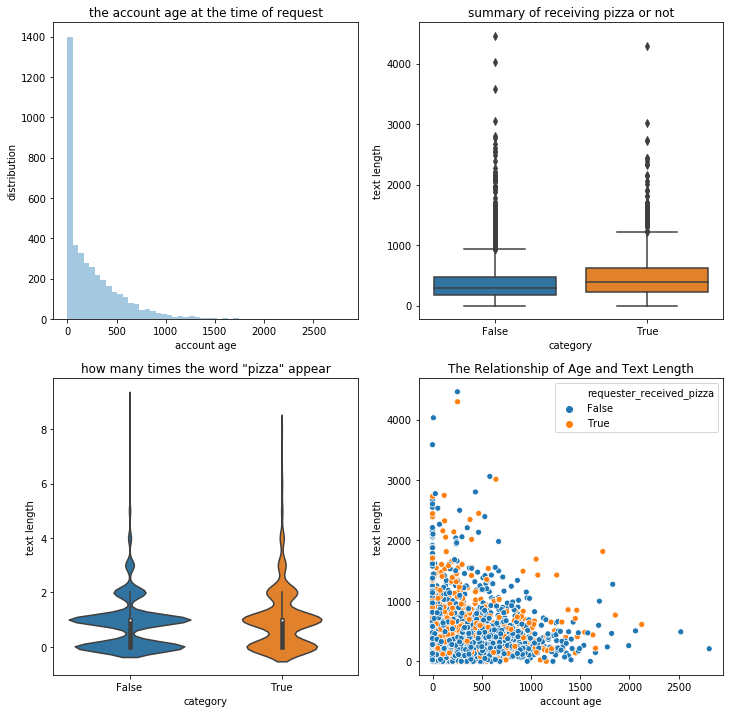

In [5]:
# Part 5
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ran = pd.read_csv('data/random_acts_pizza.csv')
ran.isnull().sum()   #show how many nulls are in this dataframe
ran.head()  #show first five rows

f, axes = plt.subplots(2, 2)  #2 rows 2 columns plots
f.set_size_inches(12, 12) #set the size of figure

#1
sns.distplot(ran['requester_account_age_in_days_at_request'],kde=False, hist=True,ax = axes[0][0]).set(title = 'the account age at the time of request', xlabel = 'account age', ylabel = "distribution")

#2
import csv
try:
    with open('data/random_acts_pizza.csv', 'r') as rp_csv:
        rp_rows = csv.reader(rp_csv)
        rp = list(rp_rows)
except IOError as ioe:
    print("IOError: " + str(ioe))
    
length = [len(rp[i][0]) for i in range(1, len(rp))]  #calculate the length of each request_text, and store it as length
sns.boxplot(x=ran['requester_received_pizza'], y=length, ax= axes[0][1]).set(title = 'summary of receiving pizza or not', xlabel = 'category', ylabel = 'text length')

#3
with_pizza = ran['request_text'].str.count('pizza')  #count the number of pizza which appears in tequest_text
sns.violinplot(x = ran['requester_received_pizza'], y=with_pizza, ax=axes[1][0]).set(title = 'how many times the word "pizza" appear', xlabel = 'category', ylabel = 'text length')

#4
sns.scatterplot(x = ran['requester_account_age_in_days_at_request'], y=length, hue= ran['requester_received_pizza'], ax=axes[1][1]).set(title = 'The Relationship of Age and Text Length', xlabel = 'account age', ylabel = 'text length')

# What to submit on Keats

For this coursework you will complete all the answer cells a shown above in this iPython Notebook.
The header of this notebook should contain your **name** and your **student number**.

Put this file, as well as any data files that have been generated as outputs for the questions above, into a **.zip** file, and upload to the indicated folder on Keats.

# Point Breakdown

The coursework will be marked out of 100 points, as follows:

- Part 1: 30 Marks
- Part 2: 20 Marks
- Part 3: 20 Marks
- Part 4: 20 Marks
- Part 5: 10 Marks

For each of the parts of the coursework marks are awarded for:
- code that runs and performs all tasks as laid out in the assignment
- appropriate use of functions and clear code layout
- well commented code

**This ASSIGNMENT is worth 10% of your mark for this module.**

# College Policy on Late Submissions

- Submissions uploaded within 24 hours of the deadline will be marked no higher than 40%
- Submissions uploaded after 24 hours of the deadline will be marked 0, unless mitigating circumstances occur.
- A mitigating circumstances form must be filed in the Informatics department office. See http://www.kcl.ac.uk/mitcircs for more details.